# Preprocessing 

In [243]:
#!pip install plotly

In [244]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import plotly.figure_factory as ff
import plotly.express as px

In [245]:
df = pd.read_csv('games_info.csv')

In [246]:
df.head()

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",review_score 8,7 Languages,Capcom,Windows,39271,5015,NaN,15 January 2016 – 16:48:00 UTC (9 years ago),"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak"
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",review_score 8,24 Languages,Playground Games,Windows,156683,21075,NaN,9 November 2021 – 04:58:00 UTC (3 years ago),"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak"
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",review_score 8,1 Languages,Revolutionary Games Studio,Windows Linux,872,70,Engine.Godot,26 November 2021 – 10:54:48 UTC (3 years ago),145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",review_score 8,12 Languages,Bloober Team SA,Windows macOS Linux,22766,2819,Engine.Unity,15 February 2016 – 21:53:00 UTC (8 years ago),"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",review_score 8,1 Languages,lazarche,Windows,834,66,"Detected Technologies (?), SDK.SteamworksNET",25 May 2023 – 10:22:41 UTC (12 months ago),"3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2244 non-null   object 
 1   STORE_GENRE            2206 non-null   object 
 2   RATING_SCORE           2210 non-null   object 
 3   N_SUPPORTED_LANGUAGES  2211 non-null   object 
 4   DEVELOPERS             2243 non-null   object 
 5   SUPPORTED_PLATFORMS    2183 non-null   object 
 6   POSITIVE_REVIEWS       2244 non-null   int64  
 7   NEGATIVE_REVIEWS       2244 non-null   int64  
 8   TECHNOLOGIES           1833 non-null   object 
 9   RELEASE_DATE           2240 non-null   object 
 10  TOTAL_TWITCH_PEAK      2244 non-null   object 
 11  PRICE                  1495 non-null   object 
 12  N_DLC                  784 non-null    float64
 13  24_HOUR_PEAK           2194 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 245.6+

In [248]:
df.describe()

,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,N_DLC
count,2.244000e+03,2244.000000,784.000000
mean,2.095212e+04,1269.950980,5.932398
std,7.562967e+04,5840.386694,17.396856
min,3.400000e+01,0.000000,1.000000
25%,7.295000e+02,33.000000,1.000000
50%,2.518500e+03,136.000000,2.000000
75%,1.043700e+04,601.250000,4.000000
max,1.257272e+06,190953.000000,379.000000


In [249]:
df.describe(include='object')

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,24_HOUR_PEAK
count,2244,2206,2210,2211,2243,2183,1833,2240,2244,1495,2194
unique,2076,324,3,36,1657,6,233,2059,2054,125,642
top,TOEM,"Store Genres Adventure (25), Indie (23)",review_score 8,1 Languages,Square Enix,Windows,Engine.Unity,17 September 2021 – 13:00:40 UTC (3 years ago),2 years ago,$19.99,4\n24-hour peak
freq,4,112,1341,580,16,1286,758,4,8,203,81


In [250]:
# duplicate_rows = df[df.duplicated(subset=['NAME'])]
# print("Duplicate Rows based on the 'NAME' column:")
# duplicate_rows
# num_duplicates = duplicate_rows.shape[0]
# print(f"Number of duplicate rows based on the 'NAME' column: {num_duplicates}")
# df = df_copy.drop_duplicates(subset=['NAME'], keep='first')
# duplicate_rows


df_copy = df.copy()
for col in df_copy.columns:
    if df_copy[col].apply(lambda x: isinstance(x, list)).any():
        df_copy[col] = df_copy[col].apply(tuple)
duplicate_rows = df_copy[df_copy.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")
df = df_copy.drop_duplicates(keep='first')
duplicate_rows

Number of duplicate rows: 124


,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK
61,The Night of the Scissors,"Store Genres Action (1), Adventure (25), Indie...",review_score 8,10 Languages,Tomás Esconjaureguy,Windows macOS Linux,343,14,Engine.Unity,13 May 2022 – 15:20:15 UTC (2 years ago),11\nall-time peak 2 years ago14 May 2022,$2.99,NaN,2\n24-hour peak
132,If My Heart Had Wings -Flight Diary-,"Store Genres Adventure (25), Casual (4), Simul...",review_score 8,3 Languages,MoeNovel,Windows,452,23,NaN,28 February 2019 – 01:56:15 UTC (5 years ago),83\nall-time peak 5 years ago28 February 2019,NaN,1.0,2\n24-hour peak
133,KNIGHTS,"Store Genres Casual (4), Indie (23), Strategy (2)",review_score 8,29 Languages,Arzola's,Windows macOS Linux,701,43,Engine.Unity,30 May 2016 – 16:50:50 UTC (8 years ago),653\nall-time peak 16 months ago16 February 2023,NaN,NaN,1\n24-hour peak
139,Command & Conquer: Red Alert™ 2 and Yuri’s Rev...,"Store Genres Action (1), RPG (3), Strategy (2)",review_score 8,5 Languages,EA Los Angeles,Windows,3651,333,NaN,7 March 2024 – 18:50:00 UTC (3 months ago),"6,617\nall-time peak 3 months ago10 March 2024",$19.88,NaN,"1,245\n24-hour peak"
156,Metro Exodus,Store Genres Action (1),review_score 8,15 Languages,4A Games,Windows macOS Linux,94019,11112,Engine.4A_Engine,15 February 2020 – 05:00:00 UTC (4 years ago),"15,375\nall-time peak 4 years ago16 February 2020",NaN,6.0,"1,203\n24-hour peak"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Shin Megami Tensei III Nocturne HD Remaster,Store Genres RPG (3),review_score 8,8 Languages,ATLUS,Windows,3189,443,Engine.Unity,25 May 2021 – 03:54:41 UTC (3 years ago),"1,906\nall-time peak 3 years ago26 May 2021",NaN,5.0,864\n24-hour peak
2222,Mining Mechs,"Store Genres Adventure (25), Casual (4), Indie...",review_score 8,29 Languages,Delayed Victory,Windows,1078,77,Engine.GameMaker,27 October 2023 – 14:00:33 UTC (7 months ago),659\nall-time peak 7 months ago30 October 2023,NaN,1.0,60\n24-hour peak
2223,東方眠世界 ~ Wonderful Waking World,"Store Genres Action (1), Indie (23)",review_score 8,2 Languages,Oligarchomp,Windows,211,5,"Engine.GameMaker, Detected Technologies (?), E...",15 June 2022 – 12:37:25 UTC (2 years ago),29\nall-time peak 2 years ago15 June 2022,NaN,NaN,3\n24-hour peak
2228,The Excavation of Hob's Barrow,Store Genres Adventure (25),review_score 8,1 Languages,Cloak and Dagger Games,Windows macOS Linux,1546,117,Engine.AdventureGameStudio,28 September 2022 – 13:00:10 UTC (2 years ago),233\nall-time peak 2 years ago2 October 2022,$14.99,1.0,37\n24-hour peak


In [251]:
df.replace('N/A', pd.NA, inplace=True)

In [252]:
if 'RELEASE_DATE' in df.columns:
    df['PUBLISH_YEAR'] = df['RELEASE_DATE'].str.extract(r'(\d{4})')

    df['PUBLISH_YEAR'] = pd.to_numeric(df['PUBLISH_YEAR'], errors='coerce')

    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].fillna(-1)
    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].astype(int)
    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].replace(-1, pd.NA)

    df = df.drop('RELEASE_DATE', axis=1)

In [253]:
# Replace null values in 'PUBLISH_YEAR' with the median of the column
median_publish_year = df['PUBLISH_YEAR'].median()
filled_publish_year = df['PUBLISH_YEAR'].fillna(median_publish_year)

In [254]:
null_count_after = df['PUBLISH_YEAR'].isnull().sum()

In [255]:
print("Null count in PUBLISH_YEAR column after dropping:", null_count_after)

Null count in PUBLISH_YEAR column after dropping: 4


In [256]:
df.dropna(subset=['PUBLISH_YEAR'], inplace=True)

In [257]:
null_count_after = df['PUBLISH_YEAR'].isnull().sum()
print("Null count in PUBLISH_YEAR column after dropping:", null_count_after)

Null count in PUBLISH_YEAR column after dropping: 0


In [258]:
df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].astype(int)

In [259]:
df.dropna(subset=['DEVELOPERS'], inplace=True)

In [260]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].fillna(1)

In [261]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].astype(str).str.replace(' Languages', '').astype(int)

In [262]:
placeholder_value = 'review_score -1'
df['RATING_SCORE'] = df['RATING_SCORE'].fillna(placeholder_value)  # Fill NaN with placeholder value
df['RATING_SCORE'] = df['RATING_SCORE'].str.replace('review_score ', '').astype(float).astype(int)  # Remove "review_score", convert to float, then to int



In [263]:
# Replace placeholder value with mean of non-placeholder values
mean_rating_score = df.loc[df['RATING_SCORE'] != -1, 'RATING_SCORE'].mean()  # Calculate mean of non-placeholder values
df.loc[df['RATING_SCORE'] == -1, 'RATING_SCORE'] = mean_rating_score  # Replace placeholder values with mean

In [264]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,Windows,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,Windows,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,Windows Linux,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,Windows macOS Linux,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,Windows,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"Store Genres Adventure (25), Casual (4), Indie...",8.0,4,Jamsanpoid,Windows macOS,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,NaN,NaN,14\n24-hour peak,2023
2240,The Forest Quartet,"Store Genres Adventure (25), Indie (23)",8.0,14,Mads & Friends,Windows,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,NaN,NaN,3\n24-hour peak,2022
2241,Purple Place - Classic Games,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,26,Sam Cohle,Windows macOS Linux,1223,150,Engine.Unity,58\nall-time peak 7 months ago22 October 2023,NaN,NaN,17\n24-hour peak,2023
2242,Mansions of Madness,"Store Genres Adventure (25), Strategy (2)",8.0,14,Fantasy Flight Games,Windows macOS,986,76,"Engine.Unity, Detected Technologies (?), Engin...",545\nall-time peak 3 years ago31 December 2020,NaN,3.0,62\n24-hour peak,2016


In [265]:
# Split the 'SUPPORTED_PLATFORMS' column into separate columns for each platform
platform_dummies = df['SUPPORTED_PLATFORMS'].str.get_dummies(sep=' ')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, platform_dummies], axis=1)

# Drop the original 'SUPPORTED_PLATFORMS' column
df.drop(columns=['SUPPORTED_PLATFORMS'], inplace=True)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"Store Genres Adventure (25), Casual (4), Indie...",8.0,4,Jamsanpoid,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,NaN,NaN,14\n24-hour peak,2023,0,1,1
2240,The Forest Quartet,"Store Genres Adventure (25), Indie (23)",8.0,14,Mads & Friends,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,NaN,NaN,3\n24-hour peak,2022,0,1,0
2241,Purple Place - Classic Games,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,26,Sam Cohle,1223,150,Engine.Unity,58\nall-time peak 7 months ago22 October 2023,NaN,NaN,17\n24-hour peak,2023,1,1,1
2242,Mansions of Madness,"Store Genres Adventure (25), Strategy (2)",8.0,14,Fantasy Flight Games,986,76,"Engine.Unity, Detected Technologies (?), Engin...",545\nall-time peak 3 years ago31 December 2020,NaN,3.0,62\n24-hour peak,2016,0,1,1


In [266]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 693


In [267]:
game_details = pd.read_csv('game_details.csv')

In [268]:
game_details['price'] = game_details['price'].replace('-', '$0')

In [269]:
# Iterate over rows with null PRICE in the main DataFrame
for index, row in df[df['PRICE'].isnull()].iterrows():
    game_name = row['NAME']
    # Find corresponding price in game_details DataFrame
    price = game_details[game_details['name'] == game_name]['price'].values

    # If price exists in game_details DataFrame, fill in the PRICE column of the main DataFrame
    if (len(price) > 0):
        print(price[0])
        df.at[index, 'PRICE'] = price[0]

$3.99
$0
$7.99
$0
$7.64
$0
$11.99
$0
$23.99
$3.99
$11.99
$0
$0
$0
$9.99
$7.49
$0
$1.99
$22.49
$0
$0
$5.99
$0
$0
$3.99
$15.99
$0
$0
$0
$10.79
$0
$0
$0
$19.79
$9.99
$0
$0
$6.99
$0
$1.99
$49.99
$0
$14.99
$44.99
$0
$0
$0
$0
$13.99
$0
$29.99
$6.99
$9.99
$7.49
$1.99
$0
$0
$4.99
$0
$0
$0
$1.99
$10.99
$5.99
$24.99
$0
$0
$19.99
$15.99
$15.29
$0
$0
$1.88
$9.89
$1.74
$0
$0
$16.99
$9.99
$0
$2.49
$1.19
$0
$14.99
$0.99
$0
$9.99
$0
$4.34
$0
$3.74
$0
$0
$0
$0
$3.99
$0
$0
$0
$0
$6.49
$0
$9.99
$2.79
$14.99
$0
$9.74
$14.99
$0
$0
$0
$6.69
$0
$0
$0
$4.99
$0
$0
$2.99
$4.99
$0
$15.59
$6.99
$0
$0.99
$0.69
$15.99
$0
$0
$6.59
$0


$9.99
$0
$0
$0
$3.99
$19.99
$0
$6.04
$0
$0
$34.99
$0
$4.19
$0
$8.99
$0
$0
$29.99
$0
$0
$0
$7.99
$0
$0
$5.99
$12.39
$0
$3.99
$0
$15.99
$0
$0
$0
$0.98
$0
$0
$0
$0.49
$1.99
$0.49
$0
$0
$0
$0
$8.70
$14.99
$9.99
$0
$0
$0
$0.49
$11.99
$9.74
$0
$49.99
$2.09
$5.83
$12.99
$0
$0
$14.99
$0
$0
$6.99
$0
$15.99
$0
$21.99
$0
$0
$17.49
$1.99
$4.19
$0
$0
$14.99
$9.99
$14.99
$0
$5.99
$0
$24.99
$0
$0
$0
$0.75
$0
$0
$4.89
$0
$0
$4.99
$0
$0
$26.99
$7.49
$2.39
$9.99
$0
$24.99
$0.99
$4.99
$8.49
$6.79
$0
$0
$0
$0
$0
$0
$0
$29.99
$3.74
$0
$4.99
$0
$10.49
$0
$11.24
$1.74
$0
$9.99
$0
$4.49
$0
$9.99
$12.59
$14.99
$0
$9.99
$0
$0
$25.19
$0
$3.99
$0
$0
$1.59
$0
$0
$0
$8.99
$0
$19.99
$0
$0
$0
$11.99
$0
$0
$0
$0
$0
$14.99
$2.99
$0
$0
$0
$0
$0
$23.99
$7.99
$0
$0
$14.99
$9.99
$0
$7.49
$0
$0
$0
$0
$7.79
$0
$4.99
$4.99
$0
$9.99
$0
$0
$3.99
$9.99
$0
$0
$0
$0
$2.39
$0
$39.99
$4.99
$9.99
$0
$8.39
$0
$0
$4.49
$0
$19.99
$0
$0
$2.99
$0
$0
$19.99
$0.89
$0
$0
$5.59
$5.45
$1.49
$0
$5.99
$0
$0.99
$6.39
$19.99
$0
$0
$0.99
$4.99
$29.

In [270]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
5,U-ena -遠花火の少女-,"Store Genres Adventure (25), Casual (4), Free ...",8.0,3,HemiolaStudio,582,41,"Engine.Lightvn, Detected Technologies (?), Eng...",2 years ago,NaN,NaN,NaN,2022,0,1,0
9,Rocket League,"Store Genres Action (1), Indie (23), Racing (9...",8.0,13,Psyonix LLC,508263,70214,"Engine.Unreal, SDK.EpicOnlineServices","147,632\nall-time peak 4 years ago27 September...",NaN,25.0,"32,851\n24-hour peak",2015,1,1,1
10,Wurroom,"Store Genres Adventure (25), Casual (4), Free ...",8.0,1,Michael Rfdshir,603,43,"Engine.Unity, Detected Technologies (?), Engin...",5 years ago,NaN,1.0,NaN,2019,0,1,0
11,Kitten adventures in city park,"Store Genres Adventure (25), Indie (23)",8.0,6,Lokator Studio,541,37,"Engine.PyGame, Engine.RenPy, Detected Technolo...",30\nall-time peak 3 years ago27 November 2021,NaN,1.0,1\n24-hour peak,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Hentai Beach,"Store Genres Adventure (25), Casual (4), Indie...",8.0,8,HornyGames,630,68,NaN,40\nall-time peak 3 years ago16 January 2021,NaN,NaN,4\n24-hour peak,2020,0,1,0
2236,WTF Do You Know?,"Store Genres Indie (23), RPG (3), Simulation (28)",8.0,1,Randumb Studios,122,6,Engine.RPGMaker,10\nall-time peak 2 years ago2 May 2022,NaN,NaN,1\n24-hour peak,2022,0,1,0
2238,From Madness with Love,"Store Genres Adventure (25), Casual (4), Indie...",8.0,4,Jamsanpoid,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,NaN,NaN,14\n24-hour peak,2023,0,1,1
2240,The Forest Quartet,"Store Genres Adventure (25), Indie (23)",8.0,14,Mads & Friends,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,NaN,NaN,3\n24-hour peak,2022,0,1,0


In [271]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 256


In [272]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"Store Genres Adventure (25), Casual (4), Indie...",8.0,4,Jamsanpoid,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,NaN,NaN,14\n24-hour peak,2023,0,1,1
2240,The Forest Quartet,"Store Genres Adventure (25), Indie (23)",8.0,14,Mads & Friends,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,NaN,NaN,3\n24-hour peak,2022,0,1,0
2241,Purple Place - Classic Games,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,26,Sam Cohle,1223,150,Engine.Unity,58\nall-time peak 7 months ago22 October 2023,NaN,NaN,17\n24-hour peak,2023,1,1,1
2242,Mansions of Madness,"Store Genres Adventure (25), Strategy (2)",8.0,14,Fantasy Flight Games,986,76,"Engine.Unity, Detected Technologies (?), Engin...",545\nall-time peak 3 years ago31 December 2020,$0,3.0,62\n24-hour peak,2016,0,1,1


In [273]:
# Drop rows with null values in the 'PRICE' column
#df.dropna(subset=['PRICE'], inplace=True)
df['PRICE'] = df['PRICE'].fillna('$0')

In [274]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS


In [275]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 0


In [276]:
#df['PRICE'] = df['PRICE'].str.replace('€', '.')

In [277]:
price_pattern = r'\$([\d.]+)'

# Extract the price from the "price" column using regex
df['PRICE'] = df['PRICE'].str.extract(price_pattern)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",0,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"Store Genres Adventure (25), Casual (4), Indie...",8.0,4,Jamsanpoid,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,0,NaN,14\n24-hour peak,2023,0,1,1
2240,The Forest Quartet,"Store Genres Adventure (25), Indie (23)",8.0,14,Mads & Friends,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,0,NaN,3\n24-hour peak,2022,0,1,0
2241,Purple Place - Classic Games,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,26,Sam Cohle,1223,150,Engine.Unity,58\nall-time peak 7 months ago22 October 2023,0,NaN,17\n24-hour peak,2023,1,1,1
2242,Mansions of Madness,"Store Genres Adventure (25), Strategy (2)",8.0,14,Fantasy Flight Games,986,76,"Engine.Unity, Detected Technologies (?), Engin...",545\nall-time peak 3 years ago31 December 2020,0,3.0,62\n24-hour peak,2016,0,1,1


In [278]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
511,Don't Pee,"Store Genres Adventure (25), Simulation (28)",8.000000,1,Naughty Clogs,163,11,Engine.Unreal,23\nall-time peak 4 months ago11 February 2024,NaN,NaN,2\n24-hour peak,2024,0,1,0
512,Ratopia,"Store Genres Adventure (25), Casual (4), Indie...",8.000000,8,Cassel Games,2043,275,Engine.Unity,"5,772\nall-time peak 7 months ago14 November 2023",NaN,NaN,256\n24-hour peak,2023,0,1,1
513,Command & Conquer™ Generals Zero Hour,"Store Genres Action (1), Strategy (2)",8.000000,9,EA Los Angeles,1384,177,NaN,"2,353\nall-time peak 2 months ago17 March 2024",NaN,NaN,"1,200\n24-hour peak",2024,0,1,0
515,OCTOPATH TRAVELER,Store Genres RPG (3),8.000000,9,Square Enix,12180,1905,Engine.Unreal,"6,177\nall-time peak 5 years ago9 June 2019",NaN,1.0,417\n24-hour peak,2019,0,1,0
516,Team Fortress Classic,Store Genres Action (1),8.000000,9,Valve,7079,1070,Engine.GoldSource,"1,897\nall-time peak 20 years ago9 August 2004",NaN,NaN,95\n24-hour peak,1999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,ISEKAI QUEST,NaN,8.391158,1,Studio Ginkgo,3235,438,Engine.Unity,4 years ago,NaN,2.0,NaN,2020,0,1,1
625,Street Legal Racing: Redline v2.3.1,NaN,8.391158,1,Invictus Games Ltd.,3304,448,NaN,7 years ago,NaN,1.0,NaN,2016,0,1,0
627,Dead Grid,"Store Genres Indie (23), RPG (3), Strategy (2)...",8.000000,1,ATOM VOID,264,21,Engine.Unity,194\nall-time peak 2 years ago26 March 2022,NaN,NaN,4\n24-hour peak,2022,0,1,0
629,Nexomon,"Store Genres Adventure (25), Casual (4), Indie...",8.000000,1,VEWO Interactive Inc.,1314,159,Engine.Unity,208\nall-time peak 4 years ago12 July 2020,NaN,NaN,17\n24-hour peak,2020,0,1,1


In [279]:
df.dropna(subset=['PRICE'], inplace=True)

In [280]:
df['PRICE'] = df['PRICE'].astype(float)

In [281]:
def clean_store_genre(genre_string):
    genres = genre_string.split(', ')
    cleaned_genres = []
    for genre in genres:
        cleaned_genre = genre.split(' (')[0]
        cleaned_genres.append(cleaned_genre)
    return cleaned_genres

df['STORE_GENRE'] = df['STORE_GENRE'].fillna('Store Genres')
df['STORE_GENRE'] = df['STORE_GENRE'].str.replace('Store Genres', '')
df['STORE_GENRE'] = df['STORE_GENRE'].apply(clean_store_genre)


In [282]:
df['24_HOUR_PEAK']

0        1,064\n24-hour peak
1       16,131\n24-hour peak
2           21\n24-hour peak
3           31\n24-hour peak
4          318\n24-hour peak
                ...         
2238        14\n24-hour peak
2240         3\n24-hour peak
2241        17\n24-hour peak
2242        62\n24-hour peak
2243         2\n24-hour peak
Name: 24_HOUR_PEAK, Length: 2034, dtype: object

In [283]:
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].fillna(("0\n24-hour peak"))
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].apply(lambda x: int(x.split('\n')[0].replace(',', ''))).astype(int)

In [284]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,1064,2016,0,1,0
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,16131,2021,0,1,0
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21,2021,1,1,0
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31,2016,1,1,1
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",0.00,4.0,318,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"[ Adventure, Casual, Indie]",8.0,4,Jamsanpoid,223,17,Engine.TyranoBuilder,132\nall-time peak 11 months ago18 July 2023,0.00,NaN,14,2023,0,1,1
2240,The Forest Quartet,"[ Adventure, Indie]",8.0,14,Mads & Friends,205,15,Engine.Unity,10\nall-time peak 2 years ago9 December 2022,0.00,NaN,3,2022,0,1,0
2241,Purple Place - Classic Games,"[ Casual, Indie, Simulation]",8.0,26,Sam Cohle,1223,150,Engine.Unity,58\nall-time peak 7 months ago22 October 2023,0.00,NaN,17,2023,1,1,1
2242,Mansions of Madness,"[ Adventure, Strategy]",8.0,14,Fantasy Flight Games,986,76,"Engine.Unity, Detected Technologies (?), Engin...",545\nall-time peak 3 years ago31 December 2020,0.00,3.0,62,2016,0,1,1


In [285]:
df['TECHNOLOGIES']

0                                                     NaN
1                                                     NaN
2                                            Engine.Godot
3                                            Engine.Unity
4            Detected Technologies (?), SDK.SteamworksNET
                              ...                        
2238                                 Engine.TyranoBuilder
2240                                         Engine.Unity
2241                                         Engine.Unity
2242    Engine.Unity, Detected Technologies (?), Engin...
2243                                         Engine.Godot
Name: TECHNOLOGIES, Length: 2034, dtype: object

In [286]:
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].fillna('')  # Replace NaN with empty string
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].apply(lambda x: x.split(', ') if x else [])

In [287]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,1064,2016,0,1,0
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,16131,2021,0,1,0
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21,2021,1,1,0
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31,2016,1,1,1
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]","3,778\nall-time peak 10 months ago18 July 2023",0.00,4.0,318,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"[ Adventure, Casual, Indie]",8.0,4,Jamsanpoid,223,17,[Engine.TyranoBuilder],132\nall-time peak 11 months ago18 July 2023,0.00,NaN,14,2023,0,1,1
2240,The Forest Quartet,"[ Adventure, Indie]",8.0,14,Mads & Friends,205,15,[Engine.Unity],10\nall-time peak 2 years ago9 December 2022,0.00,NaN,3,2022,0,1,0
2241,Purple Place - Classic Games,"[ Casual, Indie, Simulation]",8.0,26,Sam Cohle,1223,150,[Engine.Unity],58\nall-time peak 7 months ago22 October 2023,0.00,NaN,17,2023,1,1,1
2242,Mansions of Madness,"[ Adventure, Strategy]",8.0,14,Fantasy Flight Games,986,76,"[Engine.Unity, Detected Technologies (?), Engi...",545\nall-time peak 3 years ago31 December 2020,0.00,3.0,62,2016,0,1,1


In [288]:
df['TOTAL_TWITCH_PEAK']

0        27,368\nall-time peak 9 years ago17 January 2016
1       81,096\nall-time peak 3 years ago13 November 2021
2              145\nall-time peak 2 years ago24 July 2022
3          145,384\nall-time peak 6 years ago13 June 2018
4          3,778\nall-time peak 10 months ago18 July 2023
                              ...                        
2238         132\nall-time peak 11 months ago18 July 2023
2240         10\nall-time peak 2 years ago9 December 2022
2241        58\nall-time peak 7 months ago22 October 2023
2242       545\nall-time peak 3 years ago31 December 2020
2243        17\nall-time peak 6 months ago8 December 2023
Name: TOTAL_TWITCH_PEAK, Length: 2034, dtype: object

In [289]:
if 'TOTAL_TWITCH_PEAK' in df.columns:
    # Extract and convert the TWITCH_PEAK_HOUR
    df['TWITCH_PEAK_HOUR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split('\n')[0].replace(',', ''))
    df['TWITCH_PEAK_HOUR'] = pd.to_numeric(df['TWITCH_PEAK_HOUR'], errors='coerce')
    df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].fillna(-1)
    df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].astype(int)
   # df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].replace(-1, pd.NA)

    # Extract and convert the TWITCH_PEAK_YEAR
    df['TWITCH_PEAK_YEAR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split()[-1])
    df['TWITCH_PEAK_YEAR'] = pd.to_numeric(df['TWITCH_PEAK_YEAR'], errors='coerce')
    df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].fillna(-1)
    df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].astype(int)
    #df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].replace(-1, pd.NA)

    # Drop the original column
    df.drop(columns=['TOTAL_TWITCH_PEAK'], inplace=True)

In [290]:
df['N_DLC'] = pd.to_numeric(df['N_DLC'], errors='coerce')  # Ensure numeric conversion
df['N_DLC'] = df['N_DLC'].fillna(-1)  # Temporarily fill NaNs with -1
df['N_DLC'] = df['N_DLC'].astype(int)  # Convert to int
df['N_DLC'] = df['N_DLC'].replace(-1, pd.NA)  # Restore NaNs


In [291]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],22.49,3,1064,2016,0,1,0,27368,2016
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],32.78,53,16131,2021,0,1,0,81096,2021
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],2.99,<NA>,21,2021,1,1,0,145,2022
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],10.19,3,31,2016,1,1,1,145384,2018
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]",0.00,4,318,2023,0,1,0,3778,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,From Madness with Love,"[ Adventure, Casual, Indie]",8.0,4,Jamsanpoid,223,17,[Engine.TyranoBuilder],0.00,<NA>,14,2023,0,1,1,132,2023
2240,The Forest Quartet,"[ Adventure, Indie]",8.0,14,Mads & Friends,205,15,[Engine.Unity],0.00,<NA>,3,2022,0,1,0,10,2022
2241,Purple Place - Classic Games,"[ Casual, Indie, Simulation]",8.0,26,Sam Cohle,1223,150,[Engine.Unity],0.00,<NA>,17,2023,1,1,1,58,2023
2242,Mansions of Madness,"[ Adventure, Strategy]",8.0,14,Fantasy Flight Games,986,76,"[Engine.Unity, Detected Technologies (?), Engi...",0.00,3,62,2016,0,1,1,545,2020


In [292]:
df.drop(columns=['N_DLC'], inplace=True)

In [293]:
df['TOTAL_REVIEW'] = df['POSITIVE_REVIEWS'] / (df['NEGATIVE_REVIEWS'] + df['POSITIVE_REVIEWS'])

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2243
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2034 non-null   object 
 1   STORE_GENRE            2034 non-null   object 
 2   RATING_SCORE           2034 non-null   float64
 3   N_SUPPORTED_LANGUAGES  2034 non-null   int32  
 4   DEVELOPERS             2034 non-null   object 
 5   POSITIVE_REVIEWS       2034 non-null   int64  
 6   NEGATIVE_REVIEWS       2034 non-null   int64  
 7   TECHNOLOGIES           2034 non-null   object 
 8   PRICE                  2034 non-null   float64
 9   24_HOUR_PEAK           2034 non-null   int32  
 10  PUBLISH_YEAR           2034 non-null   int32  
 11  Linux                  2034 non-null   int64  
 12  Windows                2034 non-null   int64  
 13  macOS                  2034 non-null   int64  
 14  TWITCH_PEAK_HOUR       2034 non-null   int32  
 15  TWITCH_PE

# Analysis 

In [295]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import datetime
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import ttest_1samp

correlation

[Text(0.5, 0, 'RATING_SCORE'),
 Text(1.5, 0, 'POSITIVE_REVIEWS'),
 Text(2.5, 0, 'NEGATIVE_REVIEWS'),
 Text(3.5, 0, 'PRICE'),
 Text(4.5, 0, 'Linux'),
 Text(5.5, 0, 'Windows'),
 Text(6.5, 0, 'macOS'),
 Text(7.5, 0, 'TOTAL_REVIEW')]

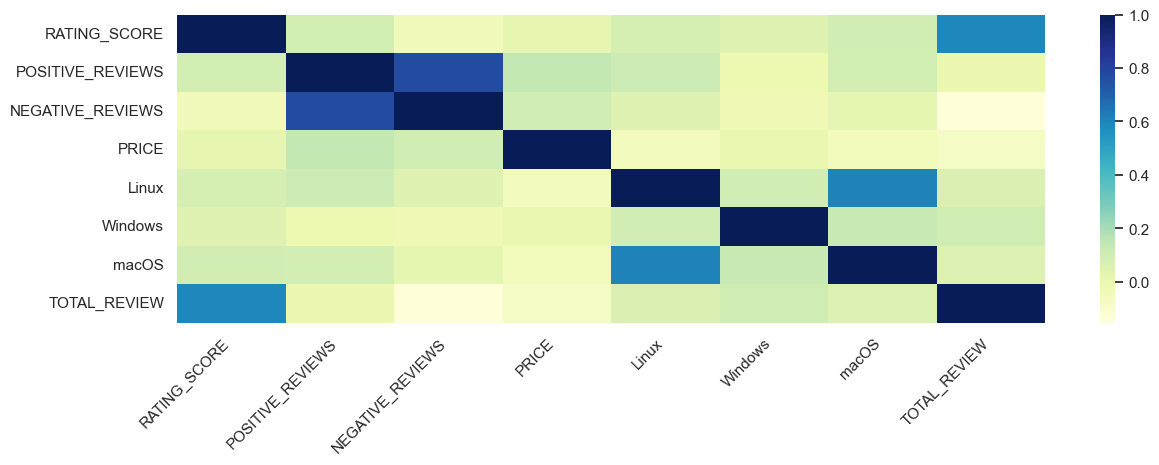

In [296]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

ax = sb.heatmap(numerical_df.corr(), cmap="YlGnBu")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Top 20 DEVELOPERS

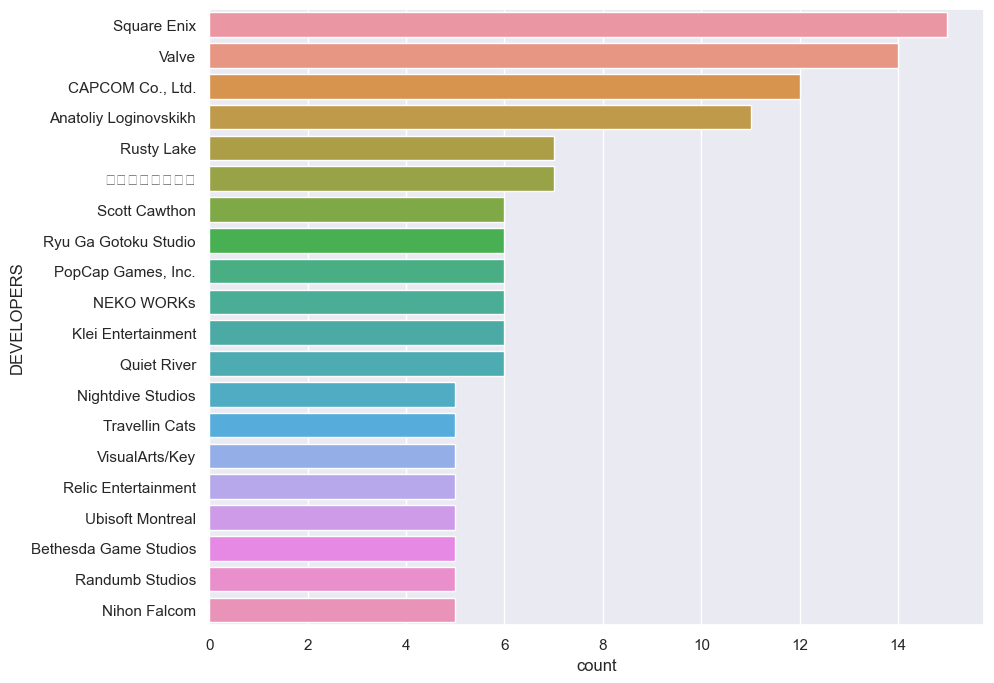

In [297]:
import warnings

warnings.filterwarnings("ignore")

# Explode
df_exploded = df.explode('DEVELOPERS')

top_20_developers = df_exploded['DEVELOPERS'].value_counts().nlargest(20).index

df_top_20 = df_exploded[df_exploded['DEVELOPERS'].isin(top_20_developers)]

plt.figure(figsize=(10, 8))

sb.countplot(y='DEVELOPERS', data=df_top_20, order=top_20_developers)
plt.show()

Top 10 GENRES

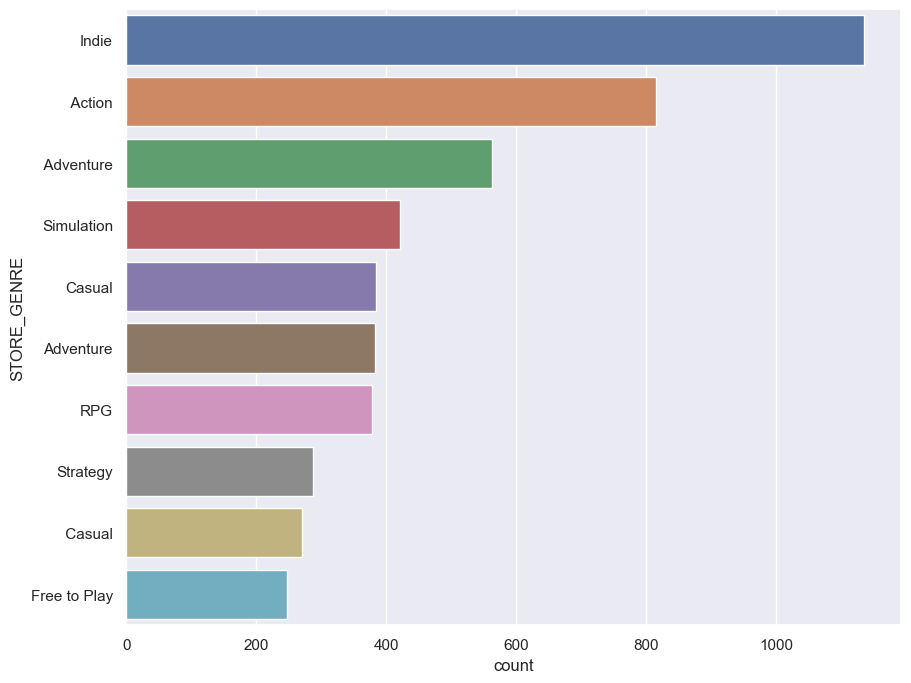

In [298]:
# Explode
df_exploded = df.explode('STORE_GENRE')

top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

plt.figure(figsize=(10, 8))

sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

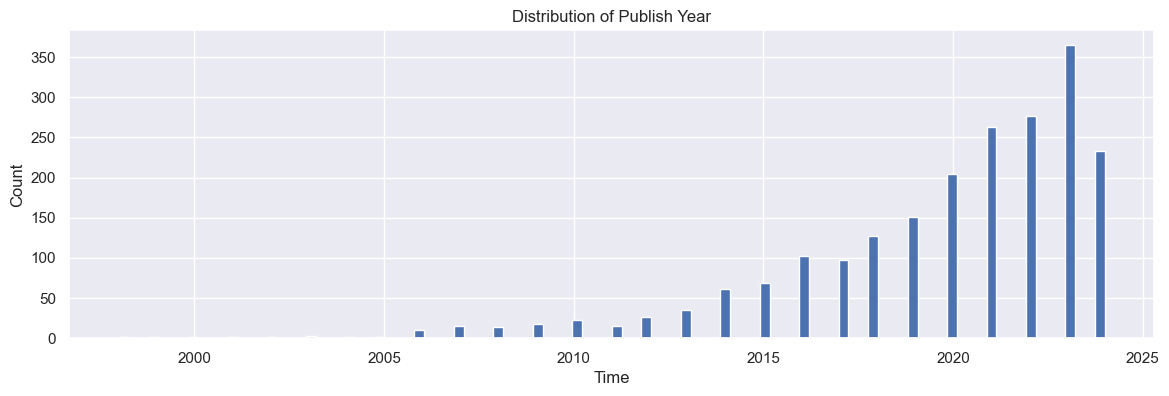

In [299]:
# Plot the histogram
plt.hist(filled_publish_year, bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()


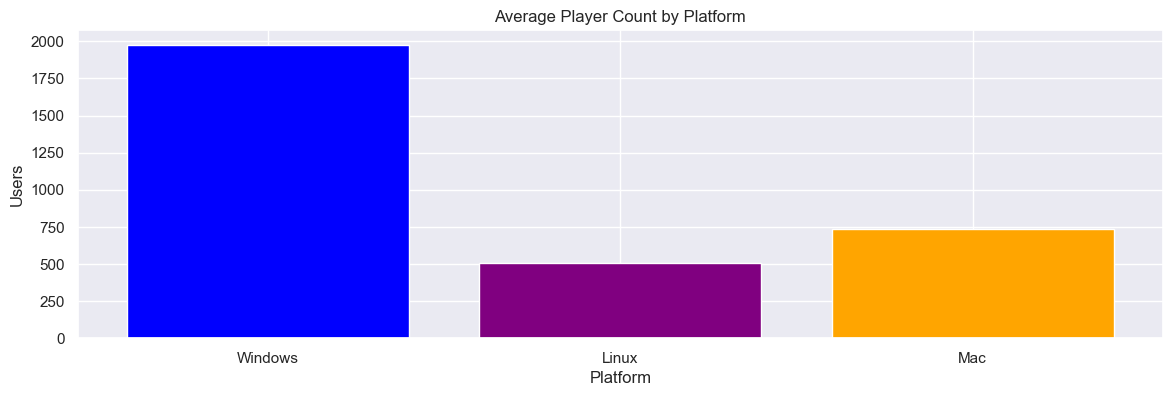

In [300]:
windows_player_counts = df['Windows'].sum()
linux_player_counts = df['Linux'].sum()
mac_player_counts = df['macOS'].sum()

platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Users')
plt.show()

In [301]:
cleaned_data_df = df.copy()
cleaned_data_df['PlatformCount'] = cleaned_data_df[['Windows', 'Linux', 'macOS']].sum(axis=1)

platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'RATING_SCORE': 'mean',
    'POSITIVE_REVIEWS': 'mean',
    'PRICE': 'mean',
    'NEGATIVE_REVIEWS': 'mean',
})

platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,RATING_SCORE,POSITIVE_REVIEWS,PRICE,NEGATIVE_REVIEWS
0,0,8.268356,25210.413793,11.231034,2074.758621
1,1,8.369064,16099.665532,12.322306,1179.266383
2,2,8.456461,16707.396122,9.549751,866.681440
3,3,8.478162,40780.770455,11.065386,1981.629545


In [302]:
cleaned_data_df['PlatformCount']

0       1
1       1
2       2
3       3
4       1
       ..
2238    2
2240    1
2241    3
2242    2
2243    2
Name: PlatformCount, Length: 2034, dtype: int64

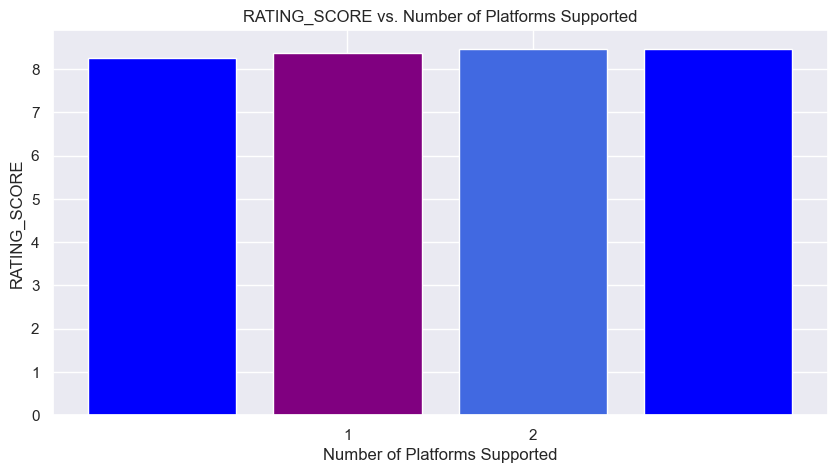

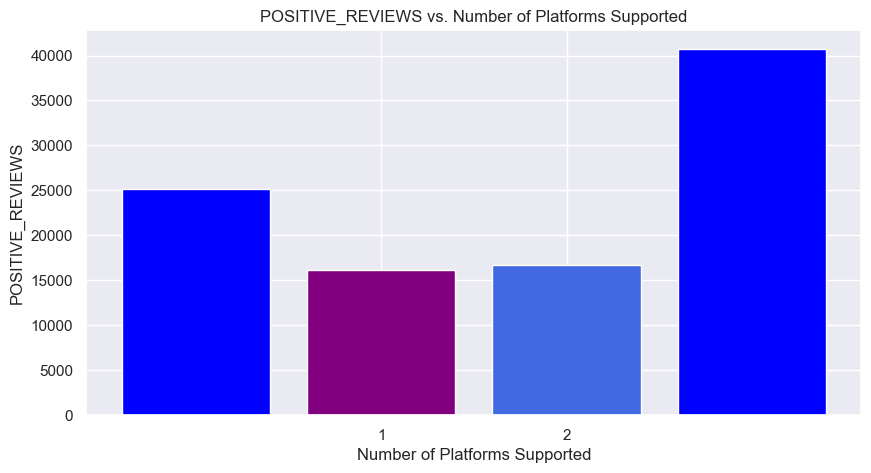

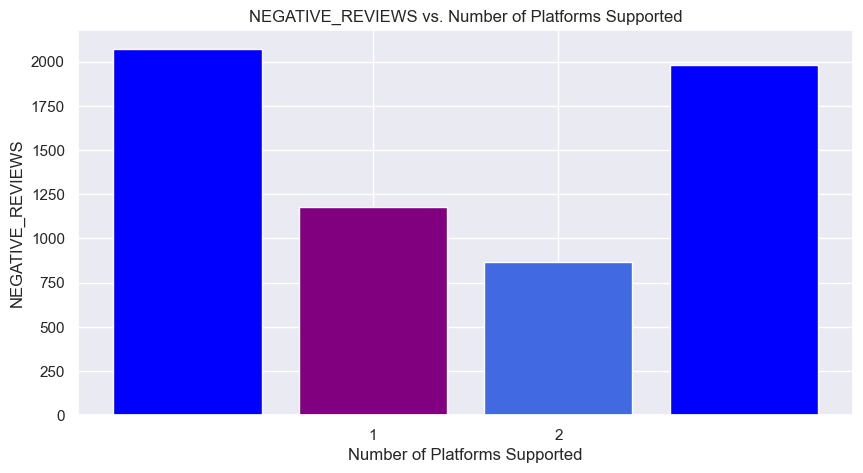

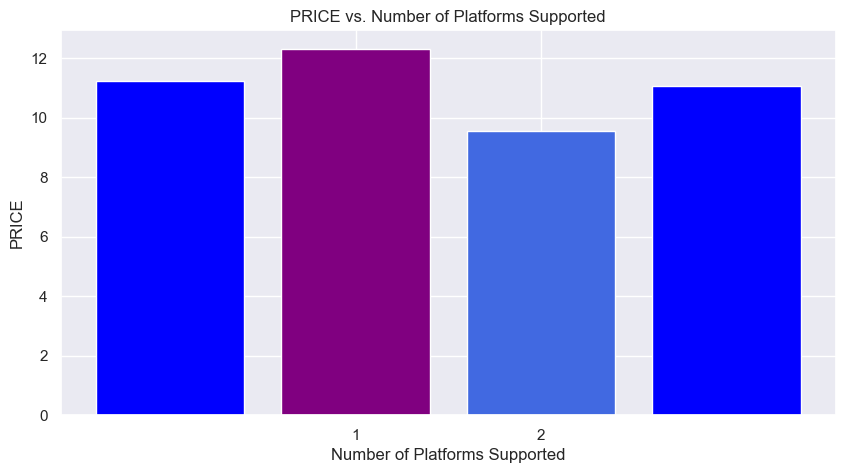

In [303]:
colors = ['blue', 'purple', 'royalblue']

metrics = ['RATING_SCORE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', 'PRICE']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

In [304]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

30                                    Two Cubes
111                                  彼方的她-Aliya
298                   Geneforge 2 - Infestation
313                         风与鸟 - Wind and Bird
319            我在疗养院送人上西天 / Last Stand Delivery
391                Cats and Seek : at Dino Park
397                            Owinka Shooter 2
399                         Of Mice and Moggies
409                          Ghost Girl Lasling
414                             Monkey Business
464                      Liminal Border Part II
498                                Harvest Hunt
572     Is this Game Trying to Kill Me? Preface
838                              Stunt Paradise
974                                  Pogo Rogue
1037      Sable's Grimoire: A Dragon's Treasure
1247                            Genome Guardian
2134                               祈風 Inorikaze
2174                                Ego's Spark
2179                                     CHAIRS
Name: NAME, dtype: object

In [305]:
df['TOTAL_REVIEW'].nlargest(n=25)

30      1.000000
111     1.000000
298     1.000000
313     1.000000
319     1.000000
391     1.000000
397     1.000000
399     1.000000
409     1.000000
414     1.000000
464     1.000000
498     1.000000
572     1.000000
838     1.000000
974     1.000000
1037    1.000000
1247    1.000000
2134    1.000000
2174    1.000000
2179    1.000000
1551    0.998583
659     0.997389
1558    0.997205
987     0.996124
1469    0.996007
Name: TOTAL_REVIEW, dtype: float64

In [306]:
df.query("TOTAL_REVIEW >= 0.996007").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]

,NAME,DEVELOPERS,STORE_GENRE,TOTAL_REVIEW
30,Two Cubes,Rombo,"[ Adventure, Indie]",1.000000
464,Liminal Border Part II,Purple Software,[ Adventure],1.000000
2174,Ego's Spark,Satsuki,[ Adventure],1.000000
2134,祈風 Inorikaze,Twilight -日月之境-,"[ Adventure, Casual, Indie]",1.000000
1247,Genome Guardian,Alpherior,"[ Action, Casual, Indie, RPG]",1.000000
1037,Sable's Grimoire: A Dragon's Treasure,Zetsubou,"[ Casual, Indie, Simulation]",1.000000
974,Pogo Rogue,Bounce Back Games,"[ Action, Adventure, Indie, Free to Play, Earl...",1.000000
838,Stunt Paradise,Brinemedia,"[ Indie, Racing, Sports]",1.000000
111,彼方的她-Aliya,TDGame,"[ Indie, RPG]",1.000000
498,Harvest Hunt,Villainous Games Studio,"[ Action, Adventure, Indie]",1.000000


In [307]:
df = df.assign(**{"FREE": df.PRICE == 0})
df.head()

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR,TOTAL_REVIEW,FREE
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],22.49,1064,2016,0,1,0,27368,2016,0.886759,False
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],32.78,16131,2021,0,1,0,81096,2021,0.881440,False
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],2.99,21,2021,1,1,0,145,2022,0.925690,False
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],10.19,31,2016,1,1,1,145384,2018,0.889818,False
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]",0.00,318,2023,0,1,0,3778,2023,0.926667,True


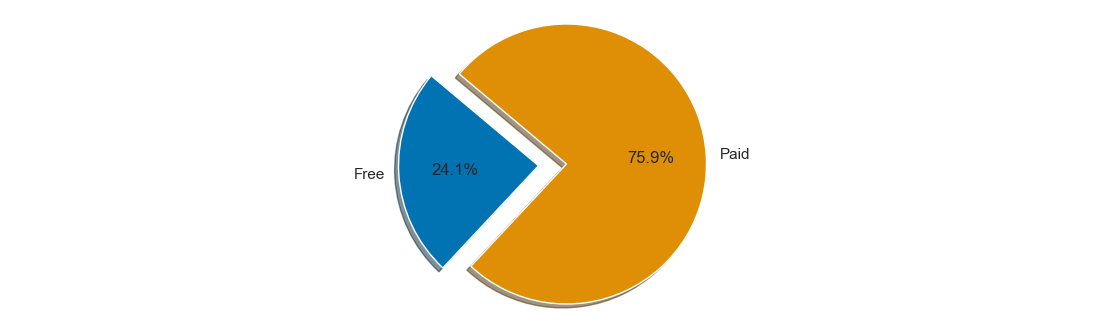

In [308]:
free_prices_dict = dict(df.FREE.value_counts())
labels = "Free", "Paid"
sizes = [free_prices_dict[True], free_prices_dict[False]]
explode = (0.2, 0)

with sb.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

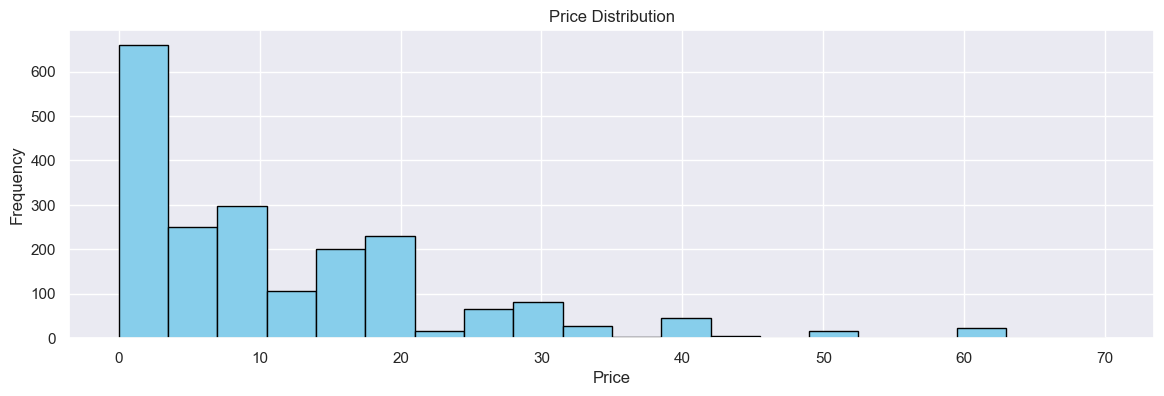

In [309]:
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [310]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


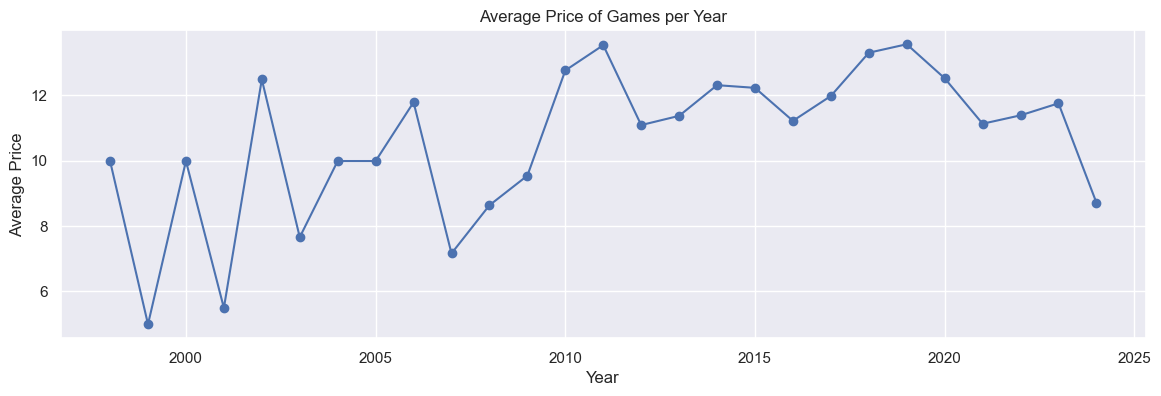

In [311]:
average_price_per_year = df.groupby('PUBLISH_YEAR')['PRICE'].mean()

# Plot the average price for each year
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Games per Year')
plt.grid(True)
plt.show()

In [312]:
df['STORE_GENRE'] = df['STORE_GENRE'].astype(str)

df['PRIMARY_GENRE'] = df['STORE_GENRE'].apply(lambda x: re.findall(r'\b[A-Za-z]+\b', x)[0] if re.findall(r'\b[A-Za-z]+\b', x) else None)


Mean Prices by Genre


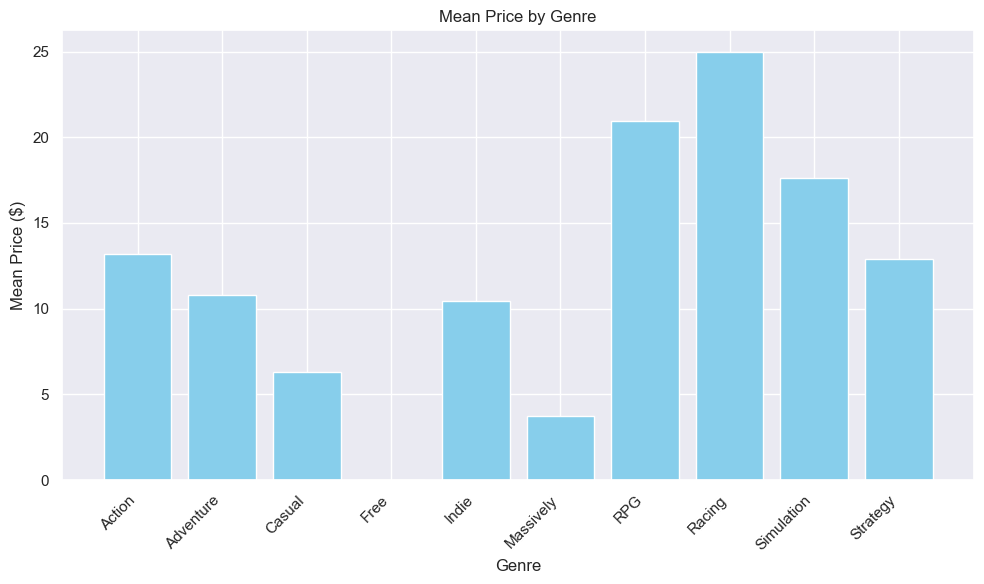

In [313]:
# Mean Price Difference by Genre
print("Mean Prices by Genre")
mean_prices_by_genre = df.groupby('PRIMARY_GENRE')['PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_prices_by_genre['PRIMARY_GENRE'], mean_prices_by_genre['PRICE'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 20 Games by Genre


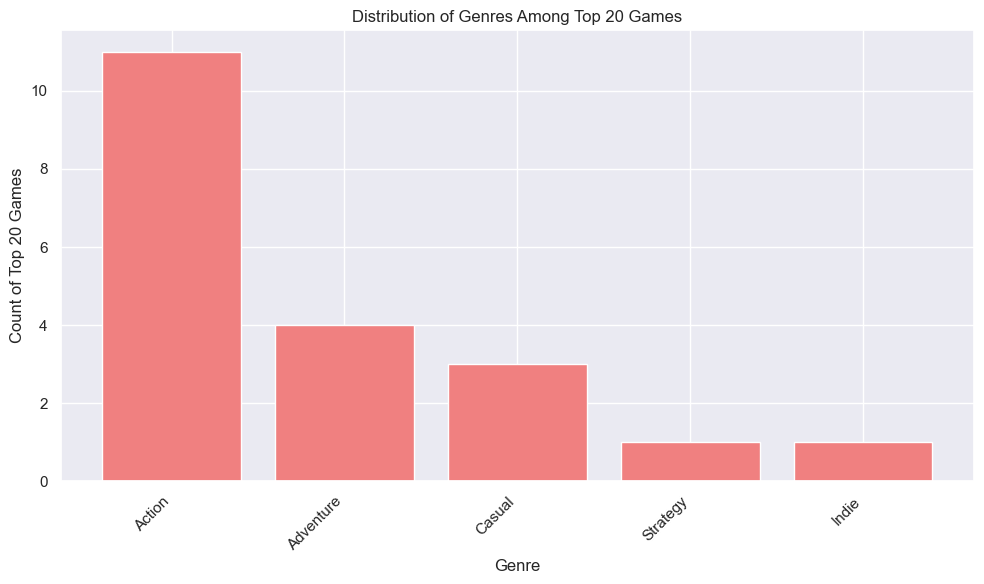

In [314]:
# Comparison of Top 20 Games based on Genre

top_20_games = df.sort_values(by='RATING_SCORE', ascending=False).head(20)

top_20_genre_counts = top_20_games['PRIMARY_GENRE'].value_counts().reset_index()
top_20_genre_counts.columns = ['PRIMARY_GENRE', 'COUNT']
print("Top 20 Games by Genre")

plt.figure(figsize=(10, 6))
plt.bar(top_20_genre_counts['PRIMARY_GENRE'], top_20_genre_counts['COUNT'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count of Top 20 Games')
plt.title('Distribution of Genres Among Top 20 Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

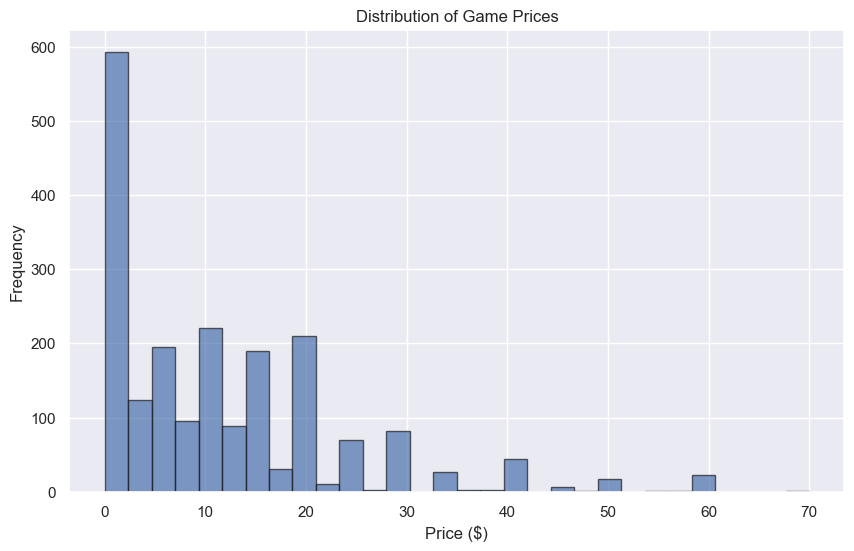

count    2034.000000
mean       11.527207
std        12.104269
min         0.000000
25%         0.990000
50%         9.990000
75%        17.990000
max        69.990000
Name: PRICE, dtype: float64

In [315]:

# Summary statistics for the PRICE column
price_summary = df['PRICE'].describe()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Game Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

price_summary

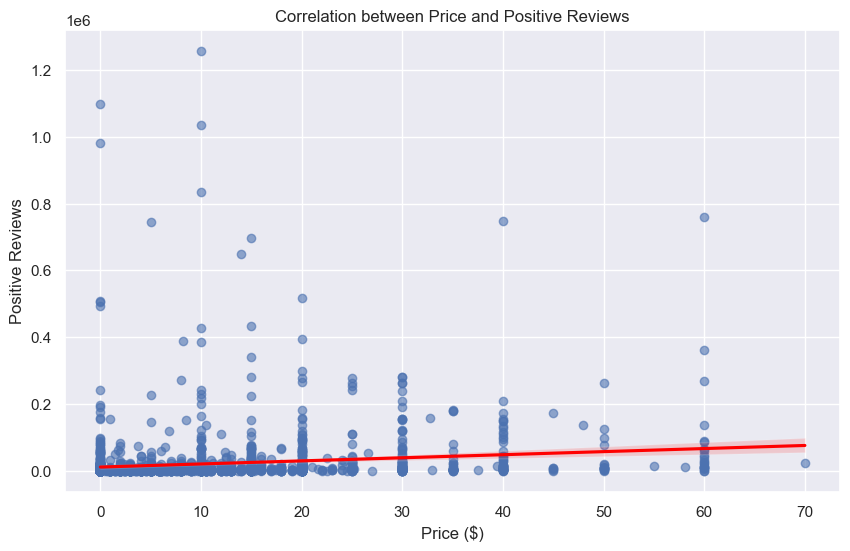

0.14182626630873812

In [316]:

# Analyze the correlation between PRICE and POSITIVE_REVIEWS
price_positive_corr = df[['PRICE', 'POSITIVE_REVIEWS']].dropna()
correlation = price_positive_corr.corr().loc['PRICE', 'POSITIVE_REVIEWS']

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='PRICE', y='POSITIVE_REVIEWS', data=price_positive_corr, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Price and Positive Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Positive Reviews')
plt.grid(True)
plt.show()

correlation

In [317]:
# Developer Analysis
developer_game_count = df['DEVELOPERS'].value_counts()

developer_price_summary = df.groupby('DEVELOPERS')['PRICE'].mean().sort_values(ascending=False)

developer_summary = pd.DataFrame({
    'Game Count': developer_game_count,
    'Average Price': developer_price_summary
}).dropna().sort_values(by='Game Count', ascending=False)

developer_summary

,Game Count,Average Price
DEVELOPERS,,
Square Enix,15,38.262667
Valve,14,6.295000
"CAPCOM Co., Ltd.",12,31.449167
Anatoliy Loginovskikh,11,1.174545
上海アリス幻樂団,7,14.990000
...,...,...
Knifes,1,5.990000
Bounce Back Games,1,0.000000
Kiwiforge,1,6.990000


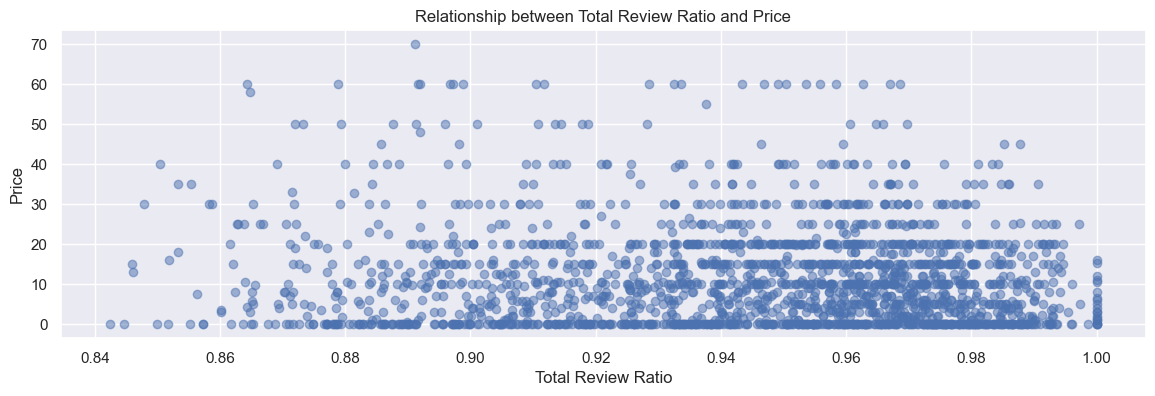

In [318]:
# Plot the relationship between TOTAL_REVIEW and PRICE
plt.scatter(df['TOTAL_REVIEW'], df['PRICE'], alpha=0.5)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.grid(True)
plt.show()


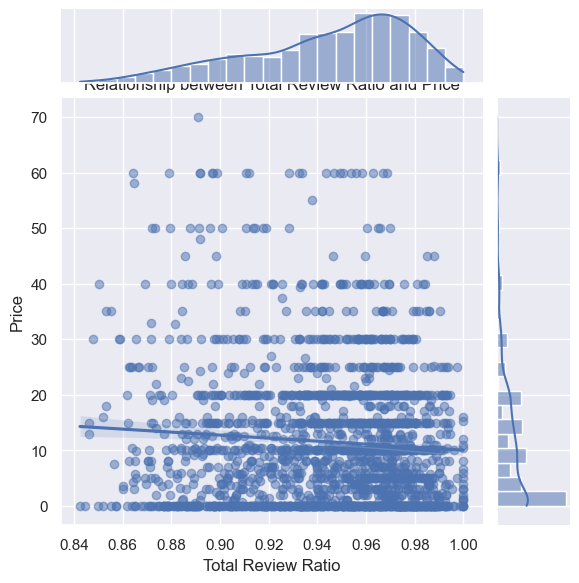

In [319]:
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


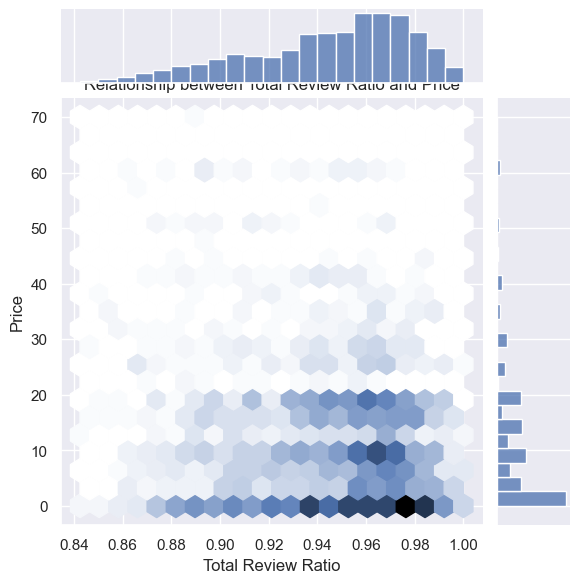

In [320]:
# Create a hexbin plot
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='hex', gridsize=20)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()
